In [1]:
!pip3 install qiskit
!pip3 install pylatexenc
!pip3 install matplotlib
!pip3 install RISE


You should consider upgrading via the 'C:\users\frede\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\users\frede\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\users\frede\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\users\frede\anaconda3\python.exe -m pip install --upgrade pip' command.


Critical analysis of initial experiment:

In an initial implementation of the quantum bomb tester by Maria Violaris, she uses two Qbit. The qubit q0 represents the photon, which is brought to a superposition via a Hadamad Gate.
The qubit q1 represents the bomb.
After that,  she uses a cnot gate, to flip q1 to 1 which means the bomb has exploded.
The state of q0 represents, whether the algorithm thinks, that there does a bomb exist (1) or not (0).

If there would be no quantum bomb, the photon follow the following operation:

$$ (H ⨂ I ) (H ⨂ I ) |00\rangle=\frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix}  \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix}  \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0\end{pmatrix} = \frac 1 {2} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix} \begin{pmatrix} 1 \\ 0 \\ 1 \\ 0\end{pmatrix} = \frac 1 {2} \begin{pmatrix} 2 \\ 0 \\ 0 \\ 0\end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0\end{pmatrix} = |00\rangle$$

Now we have a bomb which is represented by a CNOT Gate.

$$a = H|0\rangle=\frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \frac 1 {\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix} $$

Now there are two possibilities,




In [ ]:
# Code for the basic bomb tester circuit

from qiskit import QuantumCircuit

bomb_tester = QuantumCircuit(2)
bomb_tester.h(0)
bomb_tester.cx(0, 1)
bomb_tester.h(0)
bomb_tester.measure_all()
bomb_tester.draw(output='mpl')

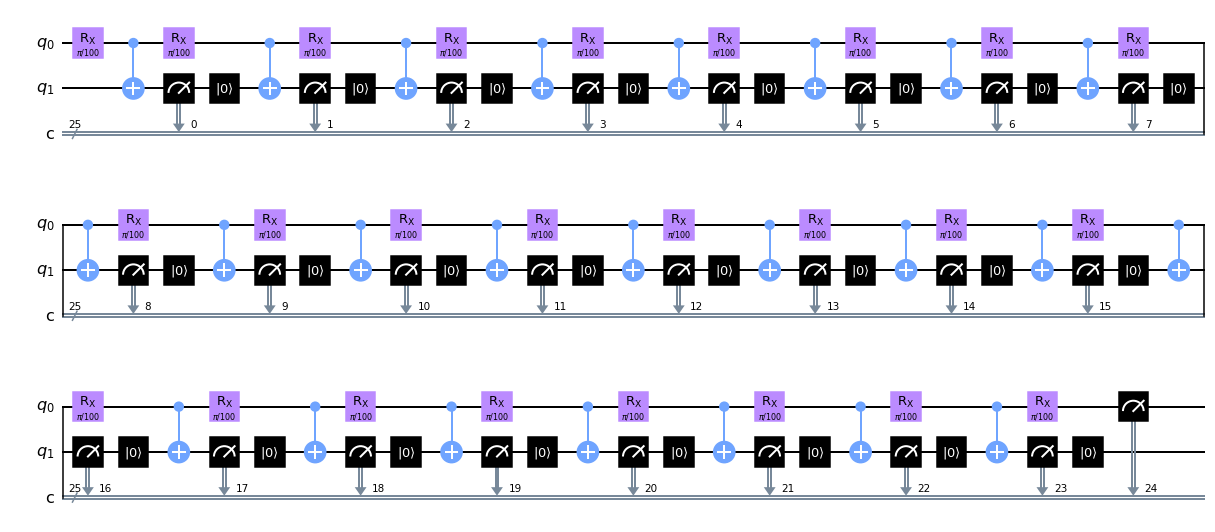

In [16]:
from qiskit.circuit import QuantumRegister, ClassicalRegister
import numpy as np
from qiskit.circuit.library import RXGate, RYGate

from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

simulator = QasmSimulator()



cycles = 25 # Choose the number of times we want to pass our photon through the mystery box. The more, the better.
theta = np.pi/100 # The correct reflectivity of our beamsplitter is chosen for the quantum Zeno effect to work.

# Create our quantum circuit
qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(cycles, 'c')
zeno_tester = QuantumCircuit(qr, cr)

# Create a chain of our variable beamsplitters and C-NOT bombs
for cycle in range(cycles-1):
    zeno_tester.append(RXGate(theta), [qr[0]])
    zeno_tester.cx(0, 1)
    zeno_tester.measure(qr[1],cr[cycle])
    zeno_tester.reset(qr[1])

# Add a final beamsplitter
zeno_tester.append(RXGate(theta), [qr[0]])

#Measure our photon to predict whether there is a bomb, and measure our bomb qubit to see if it exploded.
zeno_tester.measure(qr[0],cr[cycles-1])
zeno_tester.draw(output='mpl')


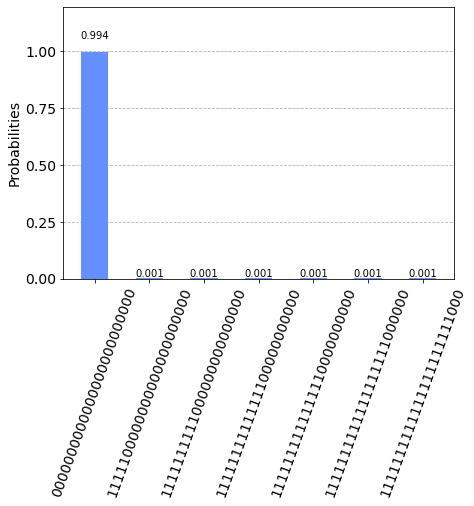

In [17]:
# Running the Zeno bomb tester

zeno_job = simulator.run(zeno_tester, shots=1000)
zeno_result = zeno_job.result()
zeno_counts = zeno_result.get_counts(zeno_tester)

plot_histogram(zeno_counts)